<a href="https://colab.research.google.com/github/jfbernalp/Anal-tica-descriptiva/blob/main/Taller_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   Juan Felipe Bernal
*   Dayana Rodriguez

# Taller 1

# Analítica Descriptiva

In [2]:
## Importamos librerías
import pandas as pd
import numpy as np
import os

In [3]:
## Montamos Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Montamos el df y mostramos las primeras filas
df = pd.read_csv ('/content/drive/MyDrive/dataset_sintetico.csv')
df.head()

,ID,Edad,Salario,Puntuacion_Credito,Género,Estado_Civil,Compras_Anuales,Deuda
0,1,56,78053.0,454.0,Femenino,Soltero,11,12229.758009
1,2,69,41959.0,789.0,Femenino,Soltero,8,21445.590682
2,3,46,25530.0,685.0,Femenino,Casado,26,5873.731550
3,4,32,114856.0,403.0,Masculino,Casado,45,26184.138932
4,5,60,NaN,692.0,Masculino,Divorciado,44,33178.717145


In [6]:
# las ultimas filas del df
df.tail()

,ID,Edad,Salario,Puntuacion_Credito,Género,Estado_Civil,Compras_Anuales,Deuda
195,196,69,71885.0,425.0,Femenino,Divorciado,11,1907.836630
196,197,30,56631.0,750.0,Masculino,Casado,23,13185.099448
197,198,58,92991.0,472.0,Masculino,Soltero,1,16668.861445
198,199,20,NaN,519.0,Masculino,Casado,46,522.055807
199,200,56,31093.0,357.0,Masculino,Divorciado,37,5776.682846


In [7]:
# Mostrar la estructura del DataFrame
print(df.info())
print("="*100)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  200 non-null    int64  
 1   Edad                200 non-null    int64  
 2   Salario             180 non-null    float64
 3   Puntuacion_Credito  180 non-null    float64
 4   Género              200 non-null    object 
 5   Estado_Civil        200 non-null    object 
 6   Compras_Anuales     200 non-null    int64  
 7   Deuda               200 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 12.6+ KB
None


In [9]:
# Mostrar un resumen estadístico de las variables numéricas
print(df.describe())
print("="*100)


               ID       Edad        Salario  Puntuacion_Credito  \
count  200.000000  200.00000     180.000000          180.000000   
mean   100.500000   43.42500   68650.238889          561.872222   
std     57.879185   14.94191   29810.242548          160.000211   
min      1.000000   18.00000   20301.000000          304.000000   
25%     50.750000   31.00000   42603.000000          424.750000   
50%    100.500000   43.50000   67843.500000          545.500000   
75%    150.250000   56.00000   93125.750000          697.500000   
max    200.000000   69.00000  119522.000000          847.000000   

       Compras_Anuales         Deuda  
count       200.000000    200.000000  
mean         24.675000  11597.653901  
std          14.432284  10083.186002  
min           1.000000     33.154905  
25%          11.000000   3799.104052  
50%          26.000000   8773.057626  
75%          37.000000  16677.209379  
max          49.000000  42434.935129  


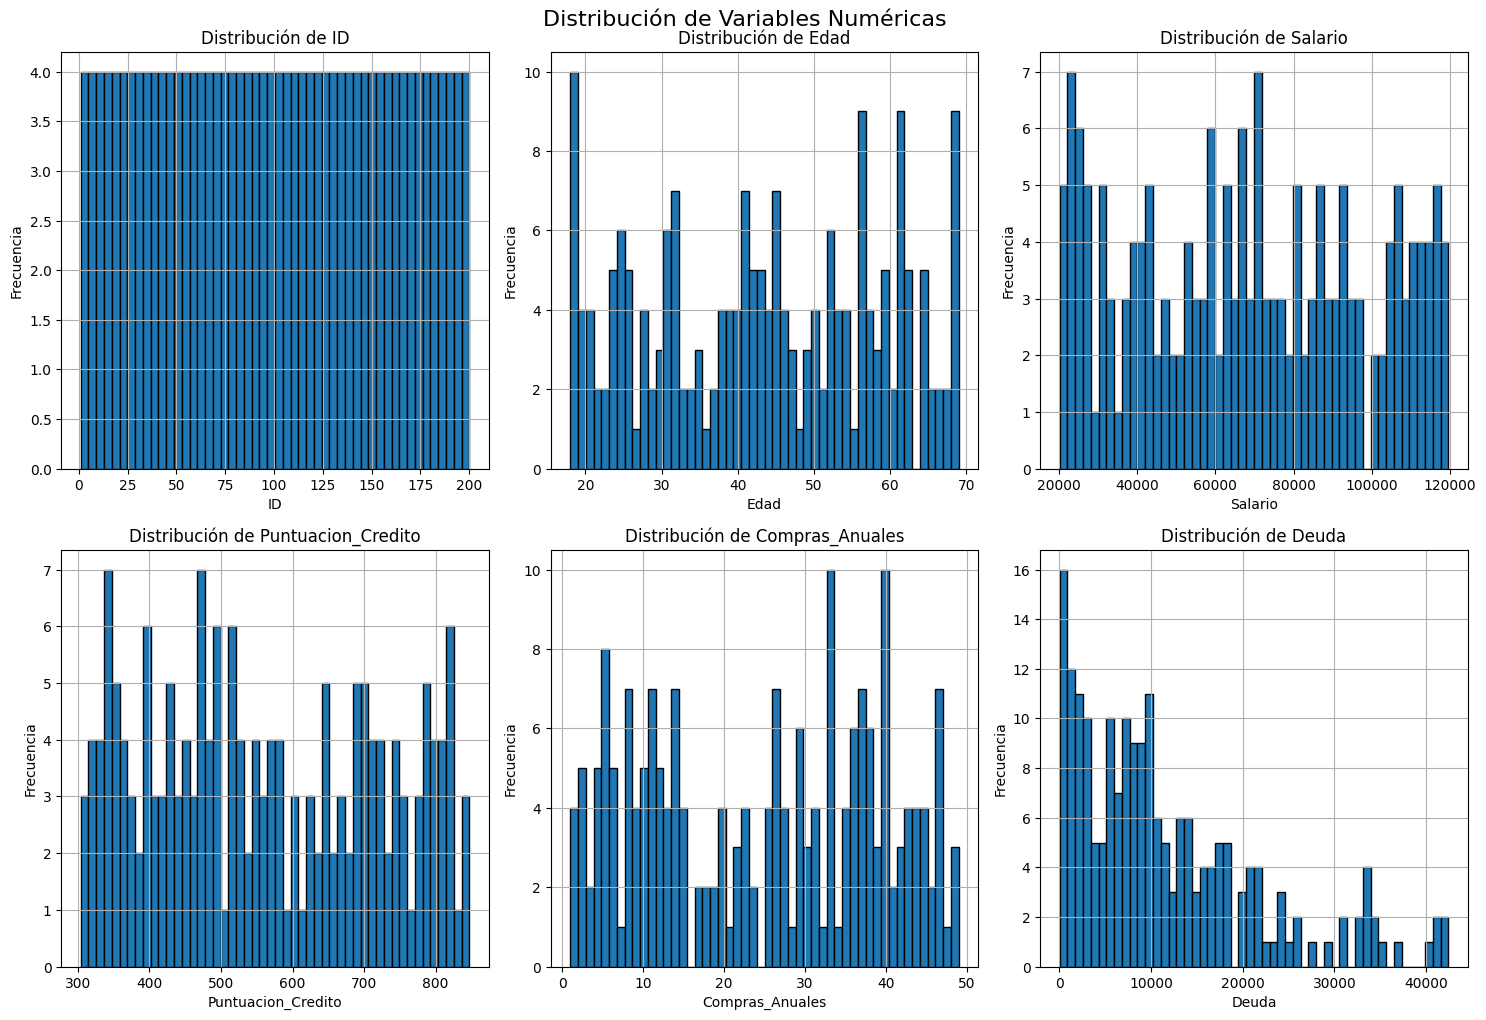

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Seleccionar solo las columnas numéricas
columnas_numericas = df.select_dtypes(include=[np.number]).columns

# Calcular el número de filas y columnas para el subplot
n = len(columnas_numericas)
nrows = 3
ncols = min(n, 3)

# Crear la figura y los subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))
fig.suptitle('Distribución de Variables Numéricas', fontsize=16)

# Aplanar el array de ejes en caso de que sea 2D
axes = axes.flatten() if n > 3 else [axes]

# Crear histogramas para cada variable numérica
for i, col in enumerate(columnas_numericas):
    ax = axes[i]
    df[col].hist(ax=ax, bins=50, edgecolor='black')
    ax.set_title(f'Distribución de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

# Ocultar subplots vacíos si los hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# **Conclusiones y comentarios**

El dataset contiene información crediticia de un grupo de 200 personas, tiene 7 columnas y 199 filas, de los datos que nos dan 2 son cuantitativos discretos a saber la edad y el ID, 4 son cuantitativos continuos y hay uno solo de tipo cualitativo binario que sería el género de las personas.En cuanto a los datos podemos ver que el promedio de edad de las personas es de 43 años siendo la edad máxima 69 años y la mínima 18 por lo que podemos concluir que el grupo poblacional está compuesto por personas mayores de edad. Podemos concluir también que el 75% de las personas incluidas tienen ingresos inferiores a los 93125, siendo el salario promedio 68650, que en este caso se ve afectado por un salario máximo de 119522 que hace que el promedio sea más alto que la media la cual es 67843 siendo en este caso preferible usar la media para entender mejor el ingreso. Solo el 25% de las personas se encuentras puntuadas por debajo de 424 puntos siendo el máximo puntaje 828. El promedio de compras anuales por persona es de 24 y no hay personas que tengan deuda 0, lo que permite concluir que son personas que hacen sus compras con tarjeta de crédito o algún otro método de endeudamiento similar, el cáso más crítico de deuda es de una persona que debe 42434.